In [6]:
import pandas as pd

In [37]:
df1 = pd.read_csv("202401-Cyclistic.csv")

In [39]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time
0,31693D4FFD069B89,electric_bike,1/8/24 15:03,1/8/24 15:03,2,31,Clark St & Elm St,TA1307000039,N Clark St & W Elm St,20249,41.902915,-87.631607,41.902901,-87.631282,member,1/8/24,15
1,5F047AD3B9E29130,classic_bike,1/4/24 12:06,1/4/24 12:07,5,31,Sedgwick St & Huron St,TA1307000062,Sedgwick St & Huron St,TA1307000062,41.894666,-87.638437,41.894666,-87.638437,casual,1/4/24,12
2,C144FA0BF1DBDF2A,electric_bike,1/10/24 14:06,1/10/24 14:07,4,31,Honore St & Division St,TA1305000034,Honore St & Division St,TA1305000034,41.903146,-87.673799,41.903119,-87.673935,member,1/10/24,14
3,B6CFC175B492F927,classic_bike,1/29/24 21:12,1/29/24 21:13,2,31,Talman Ave & Addison St,15632,Talman Ave & Addison St,15632,41.946636,-87.694615,41.946636,-87.694615,member,1/29/24,21
4,FF73B240E99EA2C0,classic_bike,1/7/24 13:15,1/7/24 13:15,1,31,Wells St & 19th St,SL-006,Wells St & 19th St,SL-006,41.856802,-87.633879,41.856802,-87.633879,member,1/7/24,13


In [12]:
import matplotlib.pyplot as plt

In [85]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [87]:
df1_weekday_count.head(14)

day_of_week  member_casual
4            member           26005
5            member           22255
2            member           19459
3            member           18644
6            member           13501
7            member            9469
1            member            8842
4            casual            4506
5            casual            4315
2            casual            3989
3            casual            3364
6            casual            3059
7            casual            2468
1            casual            2333
Name: count, dtype: int64

In [91]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,4,member,26005
1,5,member,22255
2,2,member,19459
3,3,member,18644
4,6,member,13501
5,7,member,9469
6,1,member,8842
7,4,casual,4506
8,5,casual,4315
9,2,casual,3989


In [95]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1,2333.0,8842.0
2,3989.0,19459.0
3,3364.0,18644.0
4,4506.0,26005.0
5,4315.0,22255.0
6,3059.0,13501.0
7,2468.0,9469.0


In [27]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

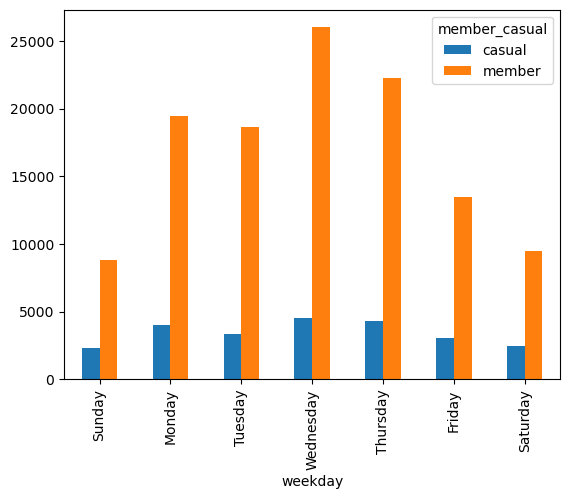

In [28]:
pivot_df1.plot(kind='bar' , x='weekday')

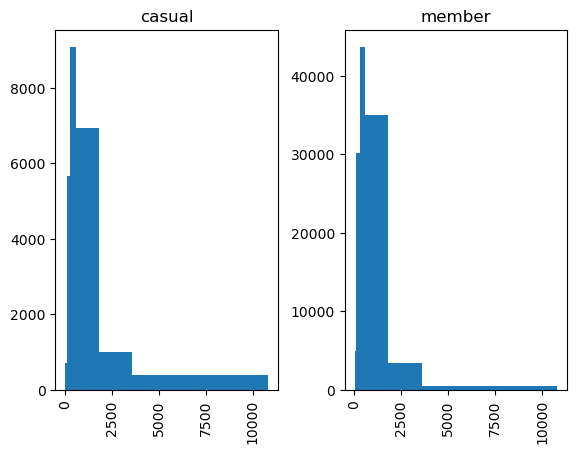

In [19]:
df1.hist(column='ride_length', bins=[30,120,300,600,1800,3600,10800], by='member_casual')
plt.show()

In [97]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [101]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [103]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [111]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [113]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

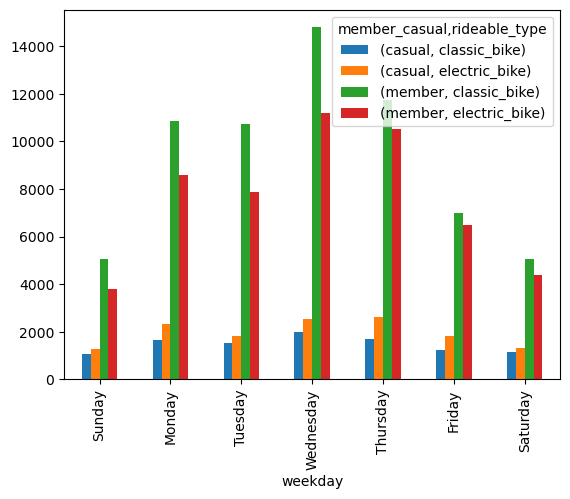

In [115]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [24]:
import folium

In [27]:
from folium.plugins import HeatMap

In [31]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [47]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [49]:
member_geo_data.head()

,start_lat,start_lng
0,41.902915,-87.631607
2,41.903146,-87.673799
3,41.946636,-87.694615
4,41.856802,-87.633879
5,41.842052,-87.617000


In [51]:
HeatMap(member_geo_data).add_to(m)

In [53]:
m.save('heatmapmember.html')

In [90]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [58]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [60]:
HeatMap(casual_geo_data).add_to(m1)

In [62]:
m1.save('heatmapcasual.html')

In [128]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [130]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
1,41.894666,-87.638437,41.894666,-87.638437
6,41.894920,-87.634372,41.894722,-87.634362
20,41.920000,-87.670000,41.920000,-87.670000
24,41.880000,-87.640000,41.880000,-87.640000
25,41.970000,-87.690000,41.970000,-87.690000


In [150]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m2)

In [152]:
m2.save('routesCasual-January.html')

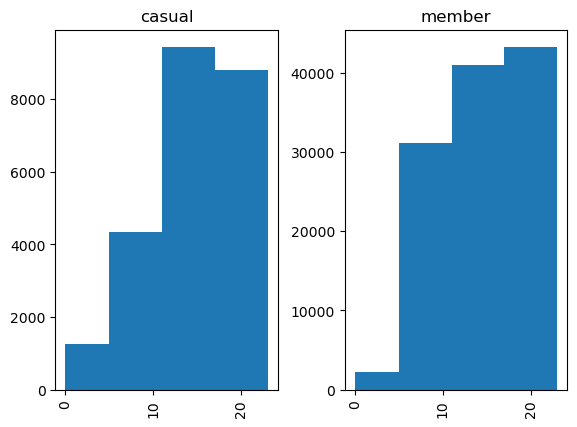

In [45]:
df1.hist(column='start_time', bins=[0,5,11,17,23], by='member_casual')
plt.show()